In [18]:
import sys

import pandas as pd

sys.path.append('/Users/samrelins/Documents/LIDA/dental_project/src/')

from baseline_data_prep import *
from education_data_prep import *
from naive_model_helpers import *
from platoon_data_prep import *
from tableone import TableOne

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Intro

Platoon data has individual tooth-level data like epi - can use to assemble another cohort of "caries_experience" observations - sampling methods have bias towards children with extractions

### Some data analysis

merge platoon caries experience with edrecs and baseline survey and do simple analysis

### some simple modelling - same spec as before

* just education data cos baseline wont work - results pretty similar to epi data

### look at predictions of epi models on platoon data

* not v good - samples pretty different

### Sample Differences

* Independence of samples unlikely to hold - seems some schools are preferred - bias towards kids with experience of extractions - data shows fewer kids doing well at school
* age - kids in dataset were observed at 9/10 - likely to have very differnt profile of tooth decay e.g. exfoliated / removed decaying primary teeth
* NOTE: Several kids from extractions groups (GA / LA) have no caries experience from derived dental obs - PROBS THAT OBS AREN'T PICKING UP EARLIER EXPERIENCE OF CARIES
* conclusion - can't identify caries prevelance from obs as easily at age 9 / 10


In [19]:
# load platoon decay dataframe

bib_dir = "/users/samrelins/documents/lida/dental_project/data/bib_data"
platoon_data = return_platoon_decay_data(bib_dir)
platoon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   entity_id          344 non-null    object 
 1   dmft               344 non-null    float64
 2   primary_caries     344 non-null    bool   
 3   DMFT               344 non-null    float64
 4   secondary_caries   344 non-null    bool   
 5   group              344 non-null    float64
 6   caries_experience  344 non-null    int64  
dtypes: bool(2), float64(3), int64(1), object(1)
memory usage: 16.8+ KB


/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [20]:
# load epi data and create caries experience variable

epi_path = os.path.join(bib_dir, "dental/dsurvey_5yo/data.csv")
epi_data = pd.read_csv(epi_path)
epi_data["caries_experience"] = (epi_data.ddsdmft > 0).astype("int")
epi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   entity_id          354 non-null    object 
 1   has_dsurvey_5yo    354 non-null    float64
 2   AgeMths            354 non-null    float64
 3   ddsdt              354 non-null    float64
 4   ddsmt              354 non-null    float64
 5   ddsft              354 non-null    float64
 6   ddsdmft            354 non-null    float64
 7   ddscareindex       354 non-null    float64
 8   caries_experience  354 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 25.0+ KB


/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [21]:
# load edrecs data with school info

edrecs_data = return_merged_edrecs_df(bib_dir, include_schools=True)
edrecs_data.info()

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11739 entries, 0 to 11738
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   entity_id                        11739 non-null  object  
 1   com_listening_attention          10598 non-null  category
 2   com_understanding                10598 non-null  category
 3   com_speaking                     10598 non-null  category
 4   exp_using_media_materials        10598 non-null  category
 5   exp_being_imaginative            10598 non-null  category
 6   lit_reading                      10598 non-null  category
 7   lit_writing                      10598 non-null  category
 8   mat_numbers                      10598 non-null  category
 9   mat_shapes_space_measures        10598 non-null  category
 10  phy_moving_handling              10598 non-null  category
 11  phy_health_self_care             10598 non-null  category
 12  pse_

In [22]:
edrecs_epi = (epi_data[["entity_id", "caries_experience"]]
                 .merge(edrecs_data,
                        on="entity_id",
                        how="left"))

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [23]:
edrecs_platoon = (platoon_data[["entity_id", "caries_experience"]]
                  .merge(edrecs_data,
                         on="entity_id",
                         how="left"))

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [24]:
pd.set_option("display.max_rows", None)
drop_cols = ["entity_id", "phonics_testestablishment1"]

edrecs_cols = list(edrecs_platoon.drop(drop_cols, axis=1).columns)
edrecs_numerical = ["phonics_mark1", "caries_experience"]
edrecs_categorical = [col for col in edrecs_cols
                  if not col in edrecs_numerical]

ep_tab = TableOne(edrecs_platoon.drop(drop_cols, axis=1),
                  columns=edrecs_cols,
                  categorical=edrecs_categorical,
                  groupby="caries_experience",
                  pval=True)
ep_tab

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Grouped by caries_experience                                               
                                                                             Missing      Overall            0            1 P-Value
n                                                                                             344          143          201        
com_listening_attention, n (%)         below_or_missing                            1    74 (21.6)    28 (19.6)    46 (23.0)   0.299
                                       exceeding                                        40 (11.7)    21 (14.7)     19 (9.5)        
                                       expected                                        229 (66.8)    94 (65.7)   135 (67.5)        
com_understanding, n (%)               below_or_missing                            1    78 (22.7)    28 (19.6)    50 (25.0)   0.240
                                       exceeding                                         34 (9.9)    18 (12.6)     16 (8.0)        
                                       expected                                        231 (67.3)    97 (67.8)   134 (67.0)        
com_speaking, n (%)                    below_or_missing                            1    90 (26.2)    34 (23.8)    56 (28.0)   0.593
                                       exceeding                                         25 (7.3)     12 (8.4)     13 (6.5)        
                                       expected                                        228 (66.5)    97 (67.8)   131 (65.5)        
exp_using_media_materials, n (%)       below_or_missing                            1    93 (27.1)    44 (30.8)    49 (24.5)   0.397
                                       exceeding                                         20 (5.8)      7 (4.9)     13 (6.5)        
                                       expected                                        230 (67.1)    92 (64.3)   138 (69.0)        
exp_being_imaginative, n (%)           below_or_missing                            1   106 (30.9)    45 (31.5)    61 (30.5)   0.275
                                       exceeding                                         11 (3.2)      2 (1.4)      9 (4.5)        
                                       expected                                        226 (65.9)    96 (67.1)   130 (65.0)        
lit_reading, n (%)                     below_or_missing                            1   121 (35.3)    44 (30.8)    77 (38.5)   0.036
                                       exceeding                                         23 (6.7)    15 (10.5)      8 (4.0)        
                                       expected                                        199 (58.0)    84 (58.7)   115 (57.5)        
lit_writing, n (%)                     below_or_missing                            1   133 (38.8)    50 (35.0)    83 (41.5)   0.062
                                       exceeding                                         18 (5.2)     12 (8.4)      6 (3.0)        
                                       expected                                        192 (56.0)    81 (56.6)   111 (55.5)        
mat_numbers, n (%)                     below_or_missing                            1   120 (35.0)    41 (28.7)    79 (39.5)   0.063
                                       exceeding                                         23 (6.7)     13 (9.1)     10 (5.0)        
                                       expected                                        200 (58.3)    89 (62.2)   111 (55.5)        
mat_shapes_space_measures, n (%)       below_or_missing                            1   110 (32.1)    37 (25.9)    73 (36.5)   0.108
                                       exceeding                                         14 (4.1)      7 (4.9)      7 (3.5)        
                                       expected                                        219 (63.8)    99 (69.2)   120 (60.0)        
phy_moving_handling, n (%)             below_or_missing                            1    56 (16.3

In [ ]:
plot_target_rate_comparison(edrecs_platoon,
                            "com_listening_attention",
                            "caries_experience")

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



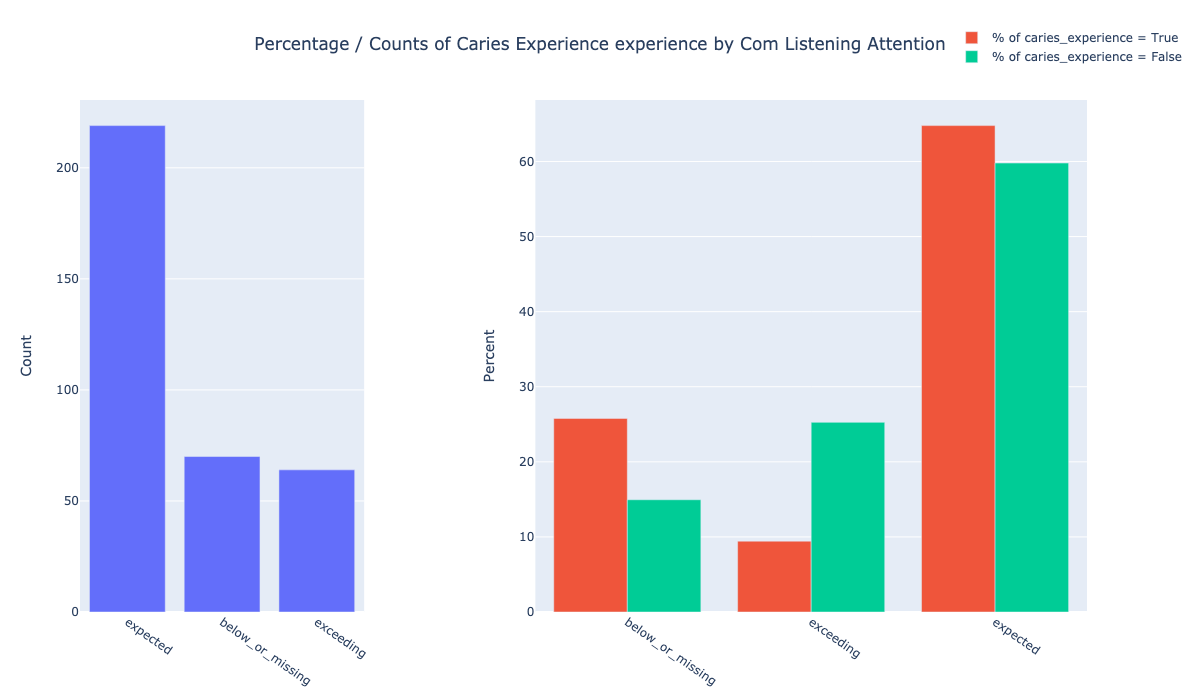

In [11]:
plot_target_rate_comparison(edrecs_epi,
                            "com_listening_attention",
                            "caries_experience")

In [10]:
baseline_data = return_reduced_baseline_ga_df(bib_dir)
baseline_data.drop("has_dental_ga", axis=1, inplace=True)

baseline_epi = (epi_data[["entity_id", "caries_experience"]]
                   .merge(baseline_data,
                          on="entity_id",
                          how="left"))

baseline_platoon = (platoon_data[["entity_id", "caries_experience"]]
                    .merge(baseline_data,
                           on="entity_id",
                           how="left"))
baseline_platoon.info()

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-10-e85097e19c98>:1: DtypeWarning:

Columns (110,247,303) have mixed types.Specify dtype option on import or set low_memory=False.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 343
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   entity_id             344 non-null    object  
 1   caries_experience     344 non-null    int64   
 2   on_benefits           272 non-null    category
 3   fathers_education     272 non-null    category
 4   mothers_education     272 non-null    category
 5   mothers_ethnicity     271 non-null    category
 6   managing_financially  272 non-null    category
 7   married_cohabiting    271 non-null    category
 8   imd_decile            272 non-null    float64 
 9   father_employment     258 non-null    category
 10  mother_employment     272 non-null    category
 11  socio_economic_pos    266 non-null    category
 12  mothers_bmi           258 non-null    float64 
 13  mother_smoked         272 non-null    category
dtypes: category(10), float64(2), int64(1), object(1)
memory us

In [11]:
drop_cols = ["entity_id"]

base_cols = list(baseline_platoon.drop(drop_cols, axis=1).columns)
base_numerical = ["mothers_bmi", "caries_experience"]
base_categorical = [col for col in base_cols
                      if not col in base_numerical]

bp_tab = TableOne(baseline_platoon.drop(drop_cols, axis=1),
                  columns=base_cols,
                  categorical=base_categorical,
                  groupby="caries_experience",
                  pval=True)
bp_tab

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Grouped by caries_experience                                            
                                                                        Missing     Overall           0           1 P-Value
n                                                                                       344         143         201        
on_benefits, n (%)          no                                               72   65 (23.9)   34 (30.6)   31 (19.3)   0.044
                            yes                                                  207 (76.1)   77 (69.4)  130 (80.7)        
fathers_education, n (%)    5_gcse                                           72   78 (28.7)   30 (27.0)   48 (29.8)   0.076
                            <5_gcse                                               46 (16.9)    11 (9.9)   35 (21.7)        
                            A_level                                               32 (11.8)   16 (14.4)    16 (9.9)        
                            dont_know                                             55 (20.2)   25 (22.5)   30 (18.6)        
                            foreign_unknown                                         5 (1.8)     4 (3.6)     1 (0.6)        
                            higher_than_A_level                                   52 (19.1)   24 (21.6)   28 (17.4)        
                            other                                                   4 (1.5)     1 (0.9)     3 (1.9)        
mothers_education, n (%)    5_gcse                                           72   85 (31.2)   35 (31.5)   50 (31.1)   0.118
                            <5_gcse                                               85 (31.2)   25 (22.5)   60 (37.3)        
                            A_level                                               36 (13.2)   19 (17.1)   17 (10.6)        
                            dont_know                                               3 (1.1)     2 (1.8)     1 (0.6)        
                            foreign_unknown                                         5 (1.8)     3 (2.7)     2 (1.2)        
                            higher_than_A_level                                   51 (18.8)   25 (22.5)   26 (16.1)        
                            other                                                   7 (2.6)     2 (1.8)     5 (3.1)        
mothers_ethnicity, n (%)    other                                            73   28 (10.3)   12 (10.8)   16 (10.0)   0.900
                            pakistani                                            223 (82.3)   90 (81.1)  133 (83.1)        
                            white_british                                          20 (7.4)     9 (8.1)    11 (6.9)        
managing_financially, n (%) doing_alright                                    72  109 (40.1)   44 (39.6)   65 (40.4)   0.504
                            just_about_getting_by                                 69 (25.4)   27 (24.3)   42 (26.1)        
                            living_comfortably                                    68 (25.0)   33 (29.7)   35 (21.7)        
                            no_answer                                               2 (0.7)     1 (0.9)     1 (0.6)        
                            quite_difficult                                        20 (7.4)     5 (4.5)    15 (9.3)        
                            very_difficult                                          4 (1.5)     1 (0.9)     3 (1.9)        
married_cohabiting, n (%)   married_n_cohabiting                             73  244 (90.0)   99 (90.0)  145 (90.1)   0.295
                            married_not_cohabiting                                 10 (3.7)     6 (5.5)     4 (2.5)        
                            not_cohabiting                                         17 (6.3)     5 (4.5)    12 (7.5)        
imd_decile, n (%)           1.0                                              72  160 (58.8)   60 (54.1)  100 (62.1)   0.170
                            2.0                                                   6

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



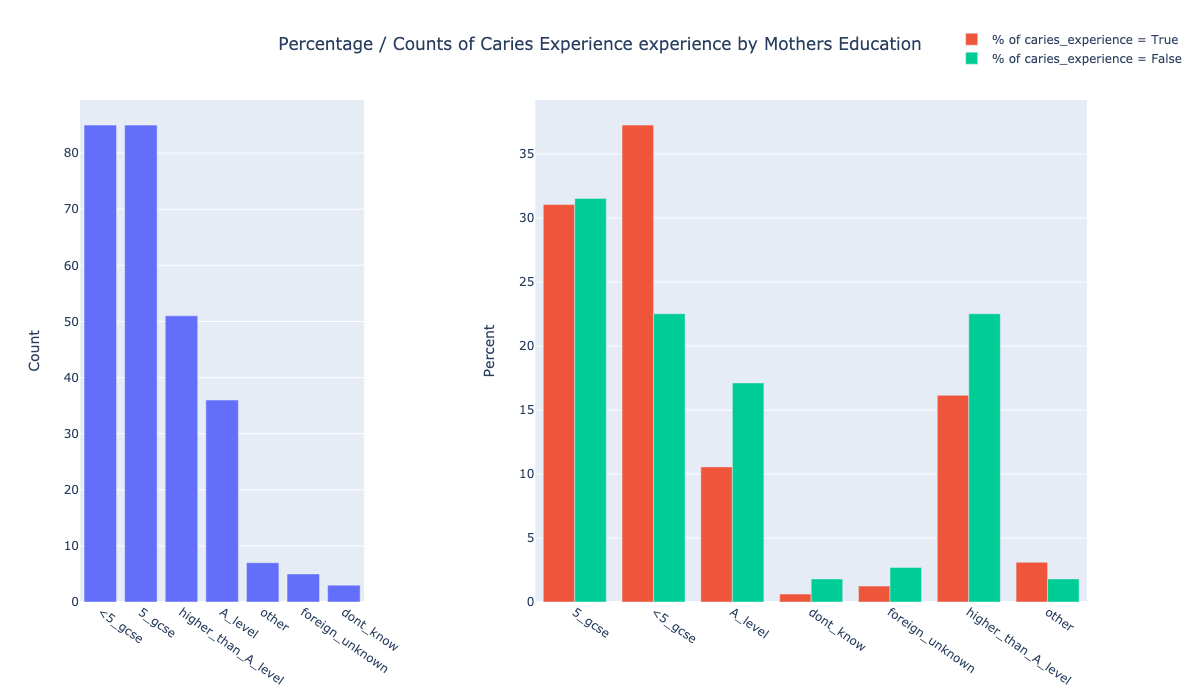

In [12]:
plot_target_rate_comparison(baseline_platoon,
                            "mothers_education",
                            "caries_experience")

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



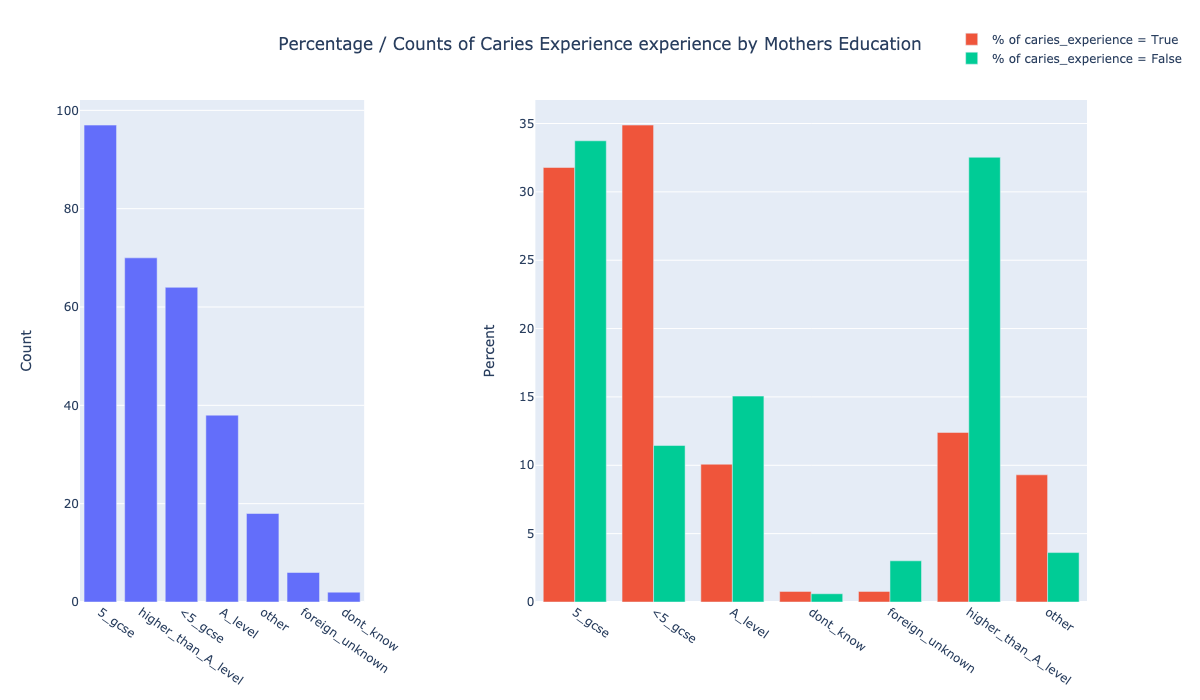

In [13]:
plot_target_rate_comparison(baseline_epi,
                            "mothers_education",
                            "caries_experience")

In [14]:
# prep dicts to store model results
plat_model_scores = {
    "Data": [],
    "Model Type": [],
    "Pseudo R^2": [],
    "Train ROC AUC": [],
    "Test ROC AUC": []
}

plat_model_roc_curves = {}

### edrecs models ###

# train unreg logistic regression model

ed_plat_train, ed_plat_test = train_test_split_by_target(
    edrecs_platoon.dropna(),
    "caries_experience"
)

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [15]:
drop_features = ['entity_id', "eal", 'caries_experience', "looked_after",
                 "phonics_testestablishment1"]

features = edrecs_platoon.drop(drop_features, axis=1).columns
patsy_string = f"caries_experience ~ "
patsy_string += " + ".join(features)

edrecs_mod = sm.Logit.from_formula(patsy_string, data=ed_plat_train)
edrecs_results = edrecs_mod.fit(maxiter=100,
                                disp=True)

# store unreg log reg model performance stats

ed_stats = return_model_performance_stats(edrecs_results,
                                          ed_plat_train,
                                          ed_plat_test)

plat_model_scores["Data"].append("edrecs")
plat_model_scores["Model Type"].append("Logistic Regression")
plat_model_scores["Pseudo R^2"].append(ed_stats[0])
plat_model_scores["Train ROC AUC"].append(ed_stats[1])
plat_model_scores["Test ROC AUC"].append(ed_stats[3])

plat_model_roc_curves["Edrecs Log Reg Train"] = ed_stats[2]
plat_model_roc_curves["Edrecs Log Reg Test"] = ed_stats[4]

# train lasso model

edrecs_reg_results = edrecs_mod.fit_regularized(alpha=2,
                                                maxiter=100,
                                                disp=True)

ed_reg_data = return_model_performance_stats(edrecs_reg_results,
                                             ed_plat_train,
                                             ed_plat_test)

plat_model_scores["Data"].append("edrecs")
plat_model_scores["Model Type"].append("Lasso Logistic Regression")
plat_model_scores["Pseudo R^2"].append(ed_reg_data[0])
plat_model_scores["Train ROC AUC"].append(ed_reg_data[1])
plat_model_scores["Test ROC AUC"].append(ed_reg_data[3])

plat_model_roc_curves["Edrecs Lasso Reg Train"] = ed_reg_data[2]
plat_model_roc_curves["Edrecs Lasso Reg Test"] = ed_reg_data[4]

# train Grad Boost model and test eval

drop_features = ['entity_id', "eal", "looked_after",
                 "phonics_testestablishment1"]
edrecs_gb_clf = cv_train_gb_classifier(ed_plat_train.drop(drop_features,
                                                         axis=1),
                                       "caries_experience")

ed_gb_data = return_model_performance_stats(edrecs_gb_clf,
                                            ed_plat_train.drop(drop_features,
                                                              axis=1),
                                            ed_plat_test.drop(drop_features,
                                                             axis=1))

plat_model_scores["Data"].append("edrecs")
plat_model_scores["Model Type"].append("Gradient Boosted Trees")
plat_model_scores["Pseudo R^2"].append(ed_gb_data[0])
plat_model_scores["Train ROC AUC"].append(ed_gb_data[1])
plat_model_scores["Test ROC AUC"].append(ed_gb_data[3])

plat_model_roc_curves["Edrecs Grad Boost Train"] = ed_gb_data[2]
plat_model_roc_curves["Edrecs Grad Boost Test"] = ed_gb_data[4]

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 0.538846
         Iterations: 100
Train ROC/AUC = 0.7885167856849709. Test ROC/AUC = 0.4762541806020067
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6644798985097973
            Iterations: 93
            Function evaluations: 95
            Gradient evaluations: 93
Train ROC/AUC = 0.6828777805138307. Test ROC/AUC = 0.4493311036789298
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Train ROC/AUC = 0.8585323811868998. Test ROC/AUC = 0.5998327759197324


In [16]:
edrecs_results.summary()

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      caries_experience   No. Observations:                  224
Model:                          Logit   Df Residuals:                      175
Method:                           MLE   Df Model:                           48
Date:                Thu, 05 Aug 2021   Pseudo R-squ.:                  0.2060
Time:                        09:47:39   Log-Likelihood:                -120.70
converged:                      False   LL-Null:                       -152.03
Covariance Type:            nonrobust   LLR p-value:                   0.07608
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.7281      1.150      0.633      0.527      -1.525       2.981
com_listening_attention[T.exceeding]            -3.9430      2.090     -1.887      0.059      -8.039       0.153
com_listening_attention[T.expected]             -0.7590      1.109     -0.685      0.494      -2.932       1.414
com_understanding[T.exceeding]                  -2.4368      2.294     -1.062      0.288      -6.932       2.059
com_understanding[T.expected]                   -0.3087      1.279     -0.241      0.809      -2.815       2.197
com_speaking[T.exceeding]                        3.3648      1.924      1.748      0.080      -0.407       7.137
com_speaking[T.expected]                         0.8626      0.867      0.995      0.320      -0.836       2.562
exp_using_media_materials[T.exceeding]           1.4124      1.550      0.911      0.362      -1.625       4.450
exp_using_media_materials[T.expected]            1.3479      0.792      1.701      0.089      -0.205       2.901
exp_being_imaginative[T.exceeding]               1.1773      1.992      0.591      0.554      -2.726       5.081
exp_being_imaginative[T.expected]               -0.1884      0.806     -0.234      0.815      -1.769       1.392
lit_reading[T.exceeding]                        -0.5172      2.408     -0.215      0.830      -5.237       4.202
lit_reading[T.expected]                         -0.2728      1.124     -0.243      0.808      -2.475       1.930
lit_writing[T.exceeding]                        -0.3740      1.981     -0.189      0.850      -4.257       3.509
lit_writing[T.expected]                          0.7294      0.884      0.825      0.409      -1.004       2.462
mat_numbers[T.exceeding]                        -3.8611      2.110     -1.830      0.067      -7.996       0.274
mat_numbers[T.expected]                         -0.7100      1.193     -0.595      0.552      -3.048       1.628
mat_shapes_space_measures[T.exceeding]          -3.9768      3.033     -1.311      0.190      -9.921       1.967
mat_shapes_space_measures[T.expected]           -0.9338      0.995     -0.938      0.348      -2.885       1.017
phy_moving_handling[T.exceeding]                 2.9330      1.426      2.057      0.040       0.139       5.727
phy_moving_handling[T.expected]                  1.1840      0.922      1.285      0.199      -0.623       2.991
phy_health_self_care[T.exceeding]                0.0096      1.512      0.006      0.995      -2.954       2.973
phy_health_self_care[T.expected]                -0.3972      0.863     -0.460      0.645      -2.088       1.294
pse_self_confidence_awareness[T.exceeding]       2.1848      2.638      0.828      0.408      -2.986       7.356
pse_self_confidence_awareness[T.expected]       -2.8204      1.384     -2.038      0.042      -5.533      -0.108
pse_managing_feelings_behaviour[T.exceeding]     4.5896      3.419      1.342

In [20]:
# prep dicts to store model results
epi_model_scores = {
    "Data": [],
    "Model Type": [],
    "Pseudo R^2": [],
    "Train ROC AUC": [],
    "Test ROC AUC": []
}

epi_model_roc_curves = {}


/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [44]:
drop_features = ['entity_id', "eal", 'caries_experience', "looked_after",
                 "phonics_testestablishment1"]

features = edrecs_epi.drop(drop_features, axis=1).columns
patsy_string = f"caries_experience ~ "
patsy_string += " + ".join(features)

edrecs_mod = sm.Logit.from_formula(patsy_string, data=edrecs_epi)
edrecs_results = edrecs_mod.fit(maxiter=100,
                                disp=True)

# store unreg log reg model performance stats

ed_stats = return_model_performance_stats(edrecs_results,
                                          edrecs_epi.dropna(),
                                          edrecs_platoon.dropna())

epi_model_scores["Data"].append("edrecs")
epi_model_scores["Model Type"].append("Logistic Regression")
epi_model_scores["Pseudo R^2"].append(ed_stats[0])
epi_model_scores["Train ROC AUC"].append(ed_stats[1])
epi_model_scores["Test ROC AUC"].append(ed_stats[3])

epi_model_roc_curves["Edrecs Log Reg Train"] = ed_stats[2]
epi_model_roc_curves["Edrecs Log Reg Test"] = ed_stats[4]

# train lasso model

edrecs_reg_results = edrecs_mod.fit_regularized(alpha=2,
                                                maxiter=100,
                                                disp=True)

ed_reg_data = return_model_performance_stats(edrecs_reg_results,
                                             edrecs_epi.dropna(),
                                             edrecs_platoon.dropna())

epi_model_scores["Data"].append("edrecs")
epi_model_scores["Model Type"].append("Lasso Logistic Regression")
epi_model_scores["Pseudo R^2"].append(ed_reg_data[0])
epi_model_scores["Train ROC AUC"].append(ed_reg_data[1])
epi_model_scores["Test ROC AUC"].append(ed_reg_data[3])

epi_model_roc_curves["Edrecs Lasso Reg Train"] = ed_reg_data[2]
epi_model_roc_curves["Edrecs Lasso Reg Test"] = ed_reg_data[4]

# train Grad Boost model and test eval

drop_features = ['entity_id', "eal", "looked_after",
                 "phonics_testestablishment1"]
edrecs_gb_clf = cv_train_gb_classifier((edrecs_epi
                                        .drop(drop_features, axis=1)
                                        .dropna()),
                                       "caries_experience")

ed_gb_data = return_model_performance_stats(edrecs_gb_clf,
                                            (edrecs_epi
                                             .drop(drop_features, axis=1)
                                             .dropna()),
                                            (edrecs_platoon
                                             .drop(drop_features, axis=1)
                                             .dropna()))

epi_model_scores["Data"].append("edrecs")
epi_model_scores["Model Type"].append("Gradient Boosted Trees")
epi_model_scores["Pseudo R^2"].append(ed_gb_data[0])
epi_model_scores["Train ROC AUC"].append(ed_gb_data[1])
epi_model_scores["Test ROC AUC"].append(ed_gb_data[3])

epi_model_roc_curves["Edrecs Grad Boost Train"] = ed_gb_data[2]
epi_model_roc_curves["Edrecs Grad Boost Test"] = ed_gb_data[4]

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Optimization terminated successfully.
         Current function value: 0.559475
         Iterations 7
Train ROC/AUC = 0.7775250227479528. Test ROC/AUC = 0.530135075612979
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6425497779102732
            Iterations: 97
            Function evaluations: 100
            Gradient evaluations: 97
Train ROC/AUC = 0.7199377056064955. Test ROC/AUC = 0.5363199236529144
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Train ROC/AUC = 0.8873451389374957. Test ROC/AUC = 0.5250513874614594


In [43]:
drop_features = ['entity_id', 'caries_experience',
                 'managing_financially',
                 'socio_economic_pos', 'mothers_bmi',
                 'mother_smoked']

features = baseline_epi.drop(drop_features, axis=1).columns
patsy_string = f"caries_experience ~ "
patsy_string += " + ".join(features)

base_mod = sm.Logit.from_formula(patsy_string, data=baseline_epi)
base_results = base_mod.fit(maxiter=100,
                            disp=True)

# store unreg log reg model performance stats

base_stats = return_model_performance_stats(base_results,
                                            baseline_epi.dropna(),
                                            baseline_platoon.dropna())

epi_model_scores["Data"].append("Baseline")
epi_model_scores["Model Type"].append("Logistic Regression")
epi_model_scores["Pseudo R^2"].append(base_stats[0])
epi_model_scores["Train ROC AUC"].append(base_stats[1])
epi_model_scores["Test ROC AUC"].append(base_stats[3])

epi_model_roc_curves["Baseline Log Reg Train"] = base_stats[2]
epi_model_roc_curves["Baseline Log Reg Test"] = base_stats[4]

# train lasso model

base_reg_results = base_mod.fit_regularized(alpha=2,
                                            maxiter=100,
                                            disp=True)

base_reg_data = return_model_performance_stats(base_reg_results,
                                               baseline_epi.dropna(),
                                               baseline_platoon.dropna())

epi_model_scores["Data"].append("Baseline")
epi_model_scores["Model Type"].append("Lasso Logistic Regression")
epi_model_scores["Pseudo R^2"].append(base_reg_data[0])
epi_model_scores["Train ROC AUC"].append(base_reg_data[1])
epi_model_scores["Test ROC AUC"].append(base_reg_data[3])

epi_model_roc_curves["Edrecs Lasso Reg Train"] = base_reg_data[2]
epi_model_roc_curves["Edrecs Lasso Reg Test"] = base_reg_data[4]

# train Grad Boost model and test eval

drop_features = ['entity_id', 'managing_financially',
                 'mother_smoked']
base_gb_clf = cv_train_gb_classifier((baseline_epi
                                      .drop(drop_features, axis=1)
                                      .dropna()),
                                     "caries_experience")

base_gb_data = return_model_performance_stats(base_gb_clf,
                                              (baseline_epi
                                               .drop(drop_features, axis=1)
                                               .dropna()),
                                              (baseline_platoon
                                               .drop(drop_features, axis=1)
                                               .dropna()))

epi_model_scores["Data"].append("Baseline")
epi_model_scores["Model Type"].append("Gradient Boosted Trees")
epi_model_scores["Pseudo R^2"].append(base_gb_data[0])
epi_model_scores["Train ROC AUC"].append(base_gb_data[1])
epi_model_scores["Test ROC AUC"].append(base_gb_data[3])

epi_model_roc_curves["Edrecs Grad Boost Train"] = base_gb_data[2]
epi_model_roc_curves["Edrecs Grad Boost Test"] = base_gb_data[4]


/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 0.579301
         Iterations: 100
Train ROC/AUC = 0.7451574569221628. Test ROC/AUC = 0.5838734952631954
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6331817498209602
            Iterations: 61
            Function evaluations: 62
            Gradient evaluations: 61
Train ROC/AUC = 0.7166369578134284. Test ROC/AUC = 0.6074862881971651
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Train ROC/AUC = 0.818716577540107. Test ROC/AUC = 0.5970154569413776


In [45]:
eb_epi = edrecs_epi

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 353
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   entity_id                        354 non-null    object  
 1   caries_experience                354 non-null    int64   
 2   com_listening_attention          353 non-null    category
 3   com_understanding                353 non-null    category
 4   com_speaking                     353 non-null    category
 5   exp_using_media_materials        353 non-null    category
 6   exp_being_imaginative            353 non-null    category
 7   lit_reading                      353 non-null    category
 8   lit_writing                      353 non-null    category
 9   mat_numbers                      353 non-null    category
 10  mat_shapes_space_measures        353 non-null    category
 11  phy_moving_handling              353 non-null    category
 12  phy_heal

/opt/anaconda3/envs/DentalEnv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

